In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression  # (For machine learning approach we use sklearn package)
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

sns.set()  #if you want to use seaborn themes with matplotlib functions

In [234]:
import warnings
warnings.filterwarnings('ignore')

In [236]:
df = pd.read_csv(r"C:\Users\EliteBook\OneDrive\Desktop\Sem III\ML - Lab\A2\student_depression_dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [238]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [240]:
df.nunique()

id                                       27901
Gender                                       2
Age                                         34
City                                        52
Profession                                  14
Academic Pressure                            6
Work Pressure                                3
CGPA                                       332
Study Satisfaction                           6
Job Satisfaction                             5
Sleep Duration                               5
Dietary Habits                               4
Degree                                      28
Have you ever had suicidal thoughts ?        2
Work/Study Hours                            13
Financial Stress                             6
Family History of Mental Illness             2
Depression                                   2
dtype: int64

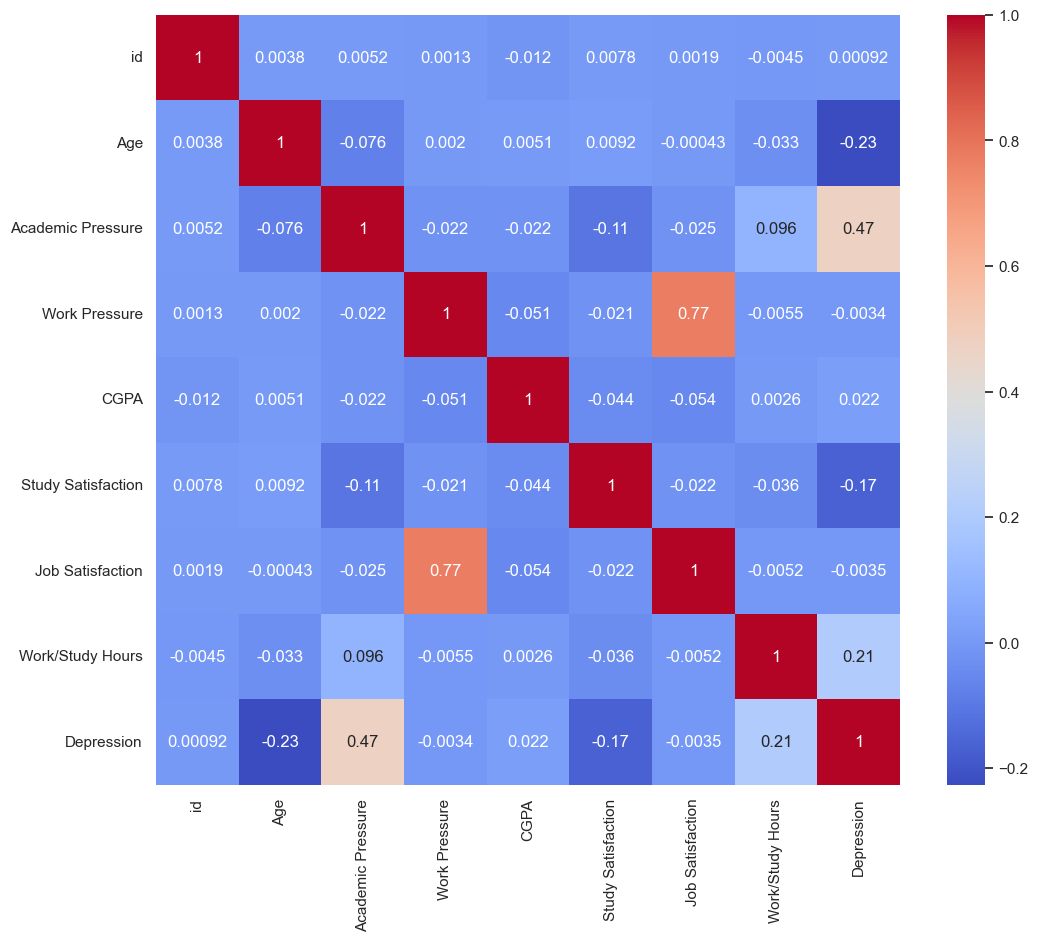

In [243]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm',annot=True)
plt.show()

#Interpretation:

Work pressure, on the other hand, has a negative effect on work-study hours.
Additionally, CGPA is weakly and negatively correlated with job satisfaction.
Work-study hours have a positive but weak correlation with CGPA.
Academic pressure shows a slight positive association with work-study hours, with a correlation coefficient of 0.096.

In [245]:
categoricals = ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree',
                'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness','Depression']
for col in categoricals:
    df[col] = df[col].astype('category')

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   id                                     27901 non-null  int64   
 1   Gender                                 27901 non-null  category
 2   Age                                    27901 non-null  float64 
 3   City                                   27901 non-null  category
 4   Profession                             27901 non-null  category
 5   Academic Pressure                      27901 non-null  float64 
 6   Work Pressure                          27901 non-null  float64 
 7   CGPA                                   27901 non-null  float64 
 8   Study Satisfaction                     27901 non-null  float64 
 9   Job Satisfaction                       27901 non-null  float64 
 10  Sleep Duration                         27901 non-null  cat

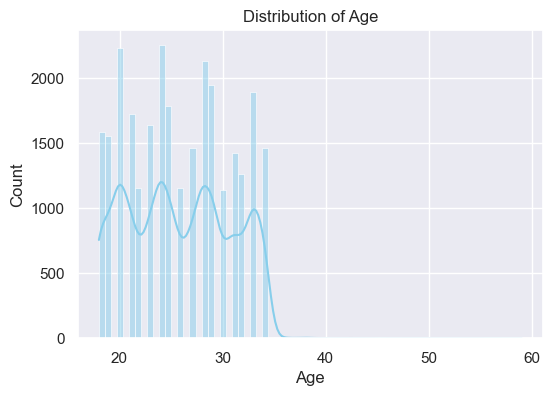

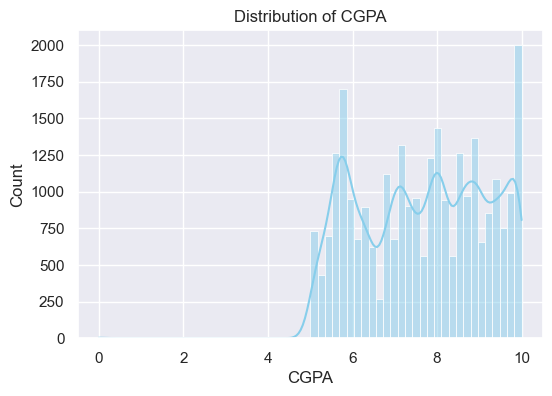

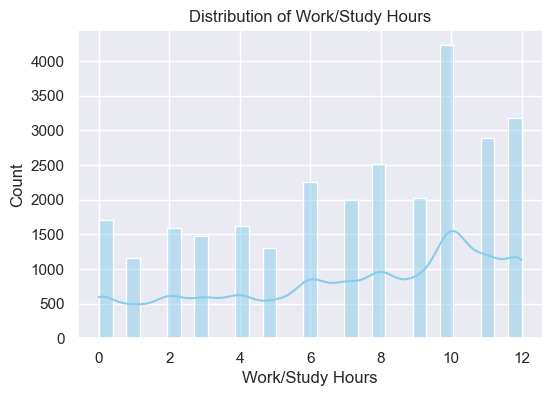

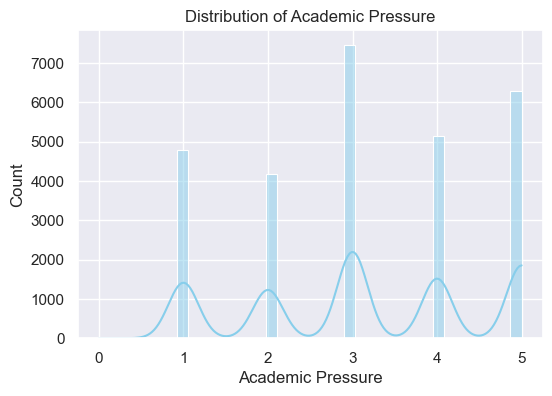

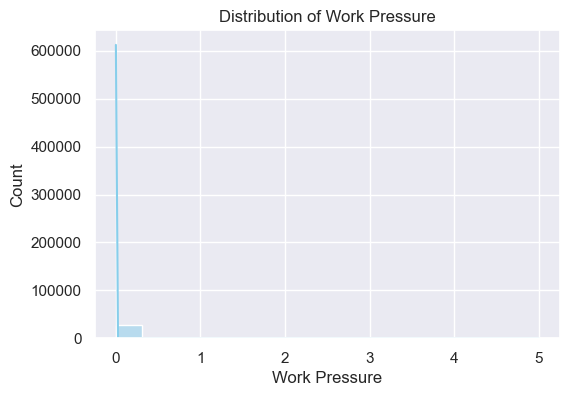

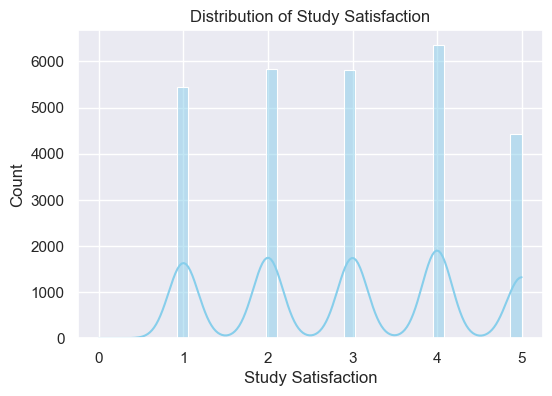

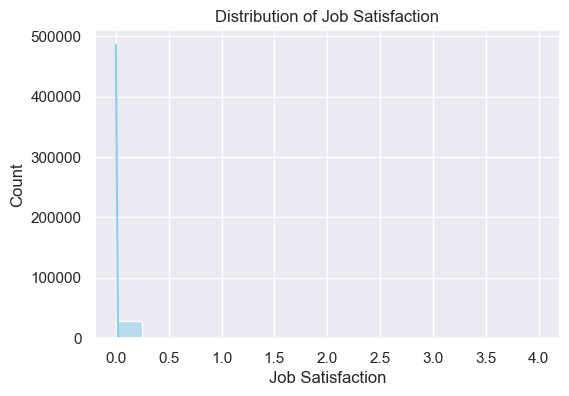

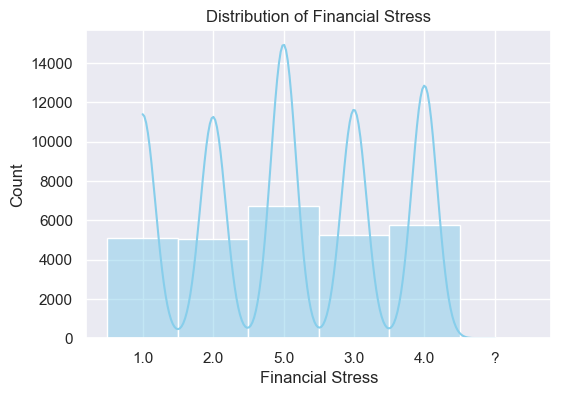

In [248]:
numerics = ['Age',  'CGPA', 'Work/Study Hours','Academic Pressure','Work Pressure','Study Satisfaction','Job Satisfaction','Financial Stress']

for col in numerics:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()

In [249]:
df['Financial Stress'] = df['Financial Stress'].replace('?', np.nan)
df['Financial Stress'] = pd.to_numeric(df['Financial Stress'])
df.dropna(inplace=True)

In [250]:
df1 = df.copy()

In [251]:
df1.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [253]:
drop = ['id','City', 'Profession','Degree']

In [254]:
df1 =df1.drop(columns = drop)
df1

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,Yes,3.0,1.0,No,1
1,Female,24.0,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,No,3.0,2.0,Yes,0
2,Male,31.0,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,No,9.0,1.0,Yes,0
3,Female,28.0,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,Yes,4.0,5.0,Yes,1
4,Female,25.0,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,Yes,7.0,1.0,Yes,0
27897,Male,27.0,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,No,0.0,3.0,Yes,0
27898,Male,31.0,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,No,12.0,2.0,No,0
27899,Female,18.0,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,Yes,10.0,5.0,No,1


In [255]:
enc = OrdinalEncoder()
cat1 = ['Have you ever had suicidal thoughts ?','Family History of Mental Illness','Gender']
df1[cat1]= enc.fit_transform(df1[cat1]).astype('int')
df1

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.0,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,1,3.0,1.0,0,1
1,0,24.0,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,0,3.0,2.0,1,0
2,1,31.0,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,0,9.0,1.0,1,0
3,0,28.0,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,1,4.0,5.0,1,1
4,0,25.0,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,1,1.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0,27.0,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,1,7.0,1.0,1,0
27897,1,27.0,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,0,0.0,3.0,1,0
27898,1,31.0,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,0,12.0,2.0,0,0
27899,0,18.0,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,1,10.0,5.0,0,1


In [256]:
cat2 = ['Dietary Habits','Sleep Duration']
dummies = pd.get_dummies(df1[cat2],drop_first= True).astype(int)
df2 = df1.drop(columns = cat2).join(dummies)
df2.head(6)

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy,Sleep Duration_'7-8 hours',Sleep Duration_'Less than 5 hours',Sleep Duration_'More than 8 hours',Sleep Duration_Others
0,1,33.0,5.0,0.0,8.97,2.0,0.0,1,3.0,1.0,0,1,0,0,0,0,0,0,0
1,0,24.0,2.0,0.0,5.90,5.0,0.0,0,3.0,2.0,1,0,1,0,0,0,0,0,0
2,1,31.0,3.0,0.0,7.03,5.0,0.0,0,9.0,1.0,1,0,0,0,0,0,1,0,0
3,0,28.0,3.0,0.0,5.59,2.0,0.0,1,4.0,5.0,1,1,1,0,0,1,0,0,0
4,0,25.0,4.0,0.0,8.13,3.0,0.0,1,1.0,1.0,0,0,1,0,0,0,0,0,0
5,1,29.0,2.0,0.0,5.70,3.0,0.0,0,4.0,1.0,0,0,0,0,0,0,1,0,0


In [257]:
df2.columns

Index(['Gender', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'Dietary Habits_Moderate', 'Dietary Habits_Others',
       'Dietary Habits_Unhealthy', 'Sleep Duration_'7-8 hours'',
       'Sleep Duration_'Less than 5 hours'',
       'Sleep Duration_'More than 8 hours'', 'Sleep Duration_Others'],
      dtype='object')

In [261]:
#Train Test Split

In [424]:
X = df2.drop('CGPA',axis= 1)
y = df2['CGPA']
rand = 42
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = rand)
np.round(len(X_train)/len(X),3)

0.8

In [263]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [264]:
X_train.head(2)

,Gender,Age,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy,Sleep Duration_'7-8 hours',Sleep Duration_'Less than 5 hours',Sleep Duration_'More than 8 hours',Sleep Duration_Others
26049,1,34.0,2.0,0.0,4.0,0.0,0,9.0,1.0,0,0,0,0,0,0,1,0,0
20528,1,23.0,5.0,0.0,2.0,0.0,1,10.0,3.0,1,1,1,0,0,1,0,0,0


In [265]:
X_train.shape

(22318, 18)

In [266]:
X_train.columns

Index(['Gender', 'Age', 'Academic Pressure', 'Work Pressure',
       'Study Satisfaction', 'Job Satisfaction',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'Dietary Habits_Moderate', 'Dietary Habits_Others',
       'Dietary Habits_Unhealthy', 'Sleep Duration_'7-8 hours'',
       'Sleep Duration_'Less than 5 hours'',
       'Sleep Duration_'More than 8 hours'', 'Sleep Duration_Others'],
      dtype='object')

In [267]:
categorics = ['Gender', 'Have you ever had suicidal thoughts ?','Family History of Mental Illness', 'Depression',
       'Dietary Habits_Moderate', 'Dietary Habits_Others',
       'Dietary Habits_Unhealthy',"Sleep Duration_'7-8 hours'",
       "Sleep Duration_'Less than 5 hours'",
       "Sleep Duration_'More than 8 hours'", 'Sleep Duration_Others']

In [268]:
X_train_scaled = scaler.fit_transform(x_train.drop(categorics,axis=1))
X_test_scaled = scaler.transform(x_test.drop(categorics, axis=1))

In [269]:
X_train_scaled

array([[ 1.67147439, -0.82113039, -0.00946688, ..., -0.01639858,
         0.49881049, -1.48616577],
       [-0.57697148,  1.34959509, -0.00946688, ..., -0.01639858,
         0.76796385, -0.09452997],
       [-0.16816314, -0.09755523, -0.00946688, ..., -0.01639858,
         1.03711722,  0.60128793],
       ...,
       [-1.59899233,  1.34959509, -0.00946688, ..., -0.01639858,
        -0.30864962,  1.29710583],
       [ 0.64945354, -0.82113039, -0.00946688, ..., -0.01639858,
         0.76796385,  1.29710583],
       [-0.57697148, -0.82113039, -0.00946688, ..., -0.01639858,
         0.22965712,  1.29710583]])

In [288]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.drop(categorics,axis=1).columns)
X_train_scaled[categorics] = X_train[categorics].reset_index(drop = True)
X_train_scaled

,Age,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Gender,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Depression,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy,Sleep Duration_'7-8 hours',Sleep Duration_'Less than 5 hours',Sleep Duration_'More than 8 hours',Sleep Duration_Others
0,1.671474,-0.821130,-0.009467,0.779327,-0.016399,0.498810,-1.486166,1,0,0,0,0,0,0,0,1,0,0
1,-0.576971,1.349595,-0.009467,-0.692475,-0.016399,0.767964,-0.094530,1,1,1,1,1,0,0,1,0,0,0
2,-0.168163,-0.097555,-0.009467,0.779327,-0.016399,1.037117,0.601288,0,1,1,1,1,0,0,1,0,0,0
3,-1.190184,-1.544706,-0.009467,-1.428377,-0.016399,-1.923570,-1.486166,0,0,0,0,0,0,1,1,0,0,0
4,0.853858,-2.268281,-0.009467,-0.692475,-0.016399,-0.577803,-1.486166,0,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22313,-0.168163,-0.821130,-0.009467,0.043426,-0.016399,0.229657,-0.790348,0,0,1,0,1,0,0,1,0,0,0
22314,-0.576971,1.349595,-0.009467,-1.428377,-0.016399,0.767964,1.297106,1,1,0,1,1,0,0,0,1,0,0
22315,-1.598992,1.349595,-0.009467,0.043426,-0.016399,-0.308650,1.297106,1,1,1,1,1,0,0,0,1,0,0
22316,0.649454,-0.821130,-0.009467,-0.692475,-0.016399,0.767964,1.297106,1,0,0,0,0,0,0,0,0,0,0


In [290]:
X_test

,Gender,Age,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy,Sleep Duration_'7-8 hours',Sleep Duration_'Less than 5 hours',Sleep Duration_'More than 8 hours',Sleep Duration_Others
16479,0,27.0,2.0,0.0,5.0,0.0,1,5.0,5.0,0,1,0,0,1,1,0,0,0
19518,1,19.0,5.0,0.0,3.0,0.0,1,9.0,1.0,0,0,0,0,1,0,0,1,0
27260,1,19.0,3.0,0.0,3.0,0.0,1,2.0,3.0,0,1,0,0,1,0,1,0,0
8318,0,26.0,5.0,0.0,1.0,0.0,1,12.0,5.0,0,1,0,0,1,0,1,0,0
9889,1,24.0,2.0,0.0,3.0,0.0,1,11.0,1.0,1,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9673,1,33.0,5.0,0.0,1.0,0.0,1,8.0,1.0,1,0,1,0,0,0,1,0,0
23,1,23.0,1.0,0.0,4.0,0.0,0,11.0,3.0,0,0,0,0,0,1,0,0,0
21669,1,31.0,2.0,0.0,5.0,0.0,0,11.0,4.0,1,1,0,0,1,1,0,0,0
22956,1,28.0,4.0,0.0,1.0,0.0,1,2.0,3.0,1,1,0,0,1,1,0,0,0


In [292]:
X_test_scaled = pd.DataFrame(X_test_scaled,columns=x_test.drop(categorics,axis=1).columns)
X_test_scaled[categorics] = X_test[categorics].reset_index(drop=True)
X_test_scaled

,Age,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Gender,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Depression,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy,Sleep Duration_'7-8 hours',Sleep Duration_'Less than 5 hours',Sleep Duration_'More than 8 hours',Sleep Duration_Others
0,0.240645,-0.821130,-0.009467,1.515229,-0.016399,-0.577803,1.297106,0,1,0,1,0,0,1,1,0,0,0
1,-1.394588,1.349595,-0.009467,0.043426,-0.016399,0.498810,-1.486166,1,1,0,0,0,0,1,0,0,1,0
2,-1.394588,-0.097555,-0.009467,0.043426,-0.016399,-1.385263,-0.094530,1,1,0,1,0,0,1,0,1,0,0
3,0.036241,1.349595,-0.009467,-1.428377,-0.016399,1.306271,1.297106,0,1,0,1,0,0,1,0,1,0,0
4,-0.372567,-0.821130,-0.009467,0.043426,-0.016399,1.037117,-1.486166,1,1,1,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5575,1.467070,1.349595,-0.009467,-1.428377,-0.016399,0.229657,-1.486166,1,1,1,0,1,0,0,0,1,0,0
5576,-0.576971,-1.544706,-0.009467,0.779327,-0.016399,1.037117,-0.094530,1,0,0,0,0,0,0,1,0,0,0
5577,1.058262,-0.821130,-0.009467,1.515229,-0.016399,1.037117,0.601288,1,0,1,1,0,0,1,1,0,0,0
5578,0.445049,0.626020,-0.009467,-1.428377,-0.016399,-1.385263,-0.094530,1,1,1,1,0,0,1,1,0,0,0


In [294]:
# Linear Regression

In [296]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()

In [298]:
reg_model.fit(X_train_scaled, y_train) 

LinearRegression()

In [300]:
y_hat = reg_model.predict(X_test_scaled)

In [302]:
test_predictions = pd.DataFrame({'actuals':y_test, 'predictions':y_hat, 'resid': y_test - y_hat})
test_predictions.head() 

,actuals,predictions,resid
16479,8.01,7.658126,0.351874
19518,6.50,7.467131,-0.967131
27260,5.74,7.727623,-1.987623
8318,5.16,7.620305,-2.460305
9889,8.44,7.724755,0.715245


In [304]:
reg_model.coef_

array([ 2.15922384e-02, -6.04276389e-02, -2.48473554e-02, -6.50954432e-02,
       -6.65865923e-02, -1.21109471e-02, -6.92040399e-03,  1.04345510e-01,
        1.01978079e-04, -1.50580998e-02,  1.25962006e-01, -4.23264982e-03,
       -3.79066247e-02, -1.54464599e-02,  1.87582996e-02, -5.22748177e-02,
       -8.61705778e-02, -1.82595605e-01])

In [306]:
df2.columns

Index(['Gender', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'Dietary Habits_Moderate', 'Dietary Habits_Others',
       'Dietary Habits_Unhealthy', 'Sleep Duration_'7-8 hours'',
       'Sleep Duration_'Less than 5 hours'',
       'Sleep Duration_'More than 8 hours'', 'Sleep Duration_Others'],
      dtype='object')

In [308]:
reg_summary = pd.DataFrame({'Features':X_train_scaled.columns , 'Coefficients':np.round(reg_model.coef_,4)})
reg_summary

,Features,Coefficients
0,Age,0.0216
1,Academic Pressure,-0.0604
2,Work Pressure,-0.0248
3,Study Satisfaction,-0.0651
4,Job Satisfaction,-0.0666
5,Work/Study Hours,-0.0121
6,Financial Stress,-0.0069
7,Gender,0.1043
8,Have you ever had suicidal thoughts ?,0.0001
9,Family History of Mental Illness,-0.0151


In [310]:
print('Training data R-squared:', np.round(reg_model.score(X_train_scaled, y_train),3))
print(f'Test data R-squared: {np.round(reg_model.score(X_test_scaled, y_test),3)}')

Training data R-squared: 0.009
Test data R-squared: 0.006


In [312]:
MSE_test = np.mean(np.square(test_predictions['resid']))
np.round(MSE_test,3)

2.175

In [314]:
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

1.475

##### Interpretation:

R-squared values are very close to 0 for both training and test sets.
This means the model explains less than 1% of the variance in the target variable.
The model is not capturing the relationship between features and the target well. 

MSE is 2.175. This measures the average of squared differences between predicted and actual values which is good.

RMSE = 1.475 implies that on average, predictions deviate from the actual values by about 1.475 units.

In [316]:
# OLS

In [318]:
import statsmodels.api as sm
X_train_sm = X_train_scaled.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

X_train_sm = sm.add_constant(X_train_sm)

model_sm = sm.OLS(y_train, X_train_sm).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                   CGPA   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     11.59
Date:                Sat, 10 May 2025   Prob (F-statistic):           2.82e-34
Time:                        19:46:54   Log-Likelihood:                -40139.
No. Observations:               22318   AIC:                         8.032e+04
Df Residuals:                   22299   BIC:                         8.047e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [400]:
y_pred = model_sm.predict(X_train_sm)

# MSE
mse = mean_squared_error(y_train, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# R-squared
r2 = r2_score(y_train, y_pred)
print(f"R-squared: {r2:.4f}")

2.174573243213805
1.4746434291766282


#Interpretation:

R-squared: 0.009
Only 0.9% of the variance in CGPA is explained by the independent variables.
This is extremely low, indicating a very weak linear relationship between the predictors and CGPA.

Adj. R-squared: 0.008
Adjusts R² for the number of predictors used. It’s slightly lower than R², confirming that adding more variables hasn't improved the model much.

The p-value (2.82e-34) is extremely small, so the overall model is statistically significant.
This means the predictors as a group are related to CGPA, despite the very low R².

MSE is 2.175. This measures the average of squared differences between predicted and actual values which is good.

RMSE = 1.475 implies that on average, predictions deviate from the actual values by about 1.475 units.

In [320]:
# Polynomial Regression

In [322]:
from sklearn.preprocessing import PolynomialFeatures

In [381]:
poly = PolynomialFeatures(degree=2, include_bias= False)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [383]:
reg_model.fit(X_train_poly, y_train)

LinearRegression()

In [384]:
y_pred_poly = reg_model.predict(X_test_poly)
y_pred_poly

array([7.74028583, 7.51775707, 7.7064413 , ..., 7.62695099, 7.79117627,
       7.55876191])

In [387]:
test_predictions2 = pd.DataFrame({'actuals':y_test, 'predictions':y_pred_poly, 'resid': y_test - y_pred_poly})
test_predictions2.head() 

,actuals,predictions,resid
16479,8.01,7.740286,0.269714
19518,6.50,7.517757,-1.017757
27260,5.74,7.706441,-1.966441
8318,5.16,7.783556,-2.623556
9889,8.44,7.619673,0.820327


In [389]:
mse2 = np.mean(np.square(test_predictions2['resid']))
np.round(mse2,3)

1.069325260060684e+17

In [391]:
rmse2 = np.sqrt(mse2)
np.round(rmse2,3)

327005391.402

##### Interpretation:

The residuals from the polynomial regression model seem reasonable when looking at individual predictions. However, the extremely high MSE and RMSE values suggest a possible data type issue in the residuals. Correcting this should provide more accurate error metrics and a clearer assessment of the model's performance.

In [206]:
# Ridge Regression

In [337]:
from sklearn.linear_model import LinearRegression, Ridge,RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

In [339]:
model_ridge = Ridge(0)

In [341]:
alpha_values = np.linspace(0.1,10,50)

In [355]:
y_hat_ridge = model_ridge.fit(X_train_scaled, y_train).predict(X_test_scaled)

In [357]:
df_predictions = pd.DataFrame({'y_test':y_test,'y_hat_ridge':y_hat_ridge})
df_predictions.head()

,y_test,y_hat_ridge
16479,8.01,7.658126
19518,6.50,7.467131
27260,5.74,7.727623
8318,5.16,7.620305
9889,8.44,7.724755


In [359]:
coefficients = pd.DataFrame({'Features':df2.drop('CGPA', axis=1, inplace=False).columns})
coefficients['model_ridge']= model_ridge.coef_

In [361]:
coefficients

,Features,model_ridge
0,Gender,0.021592
1,Age,-0.060428
2,Academic Pressure,-0.024847
3,Work Pressure,-0.065095
4,Study Satisfaction,-0.066587
5,Job Satisfaction,-0.012111
6,Have you ever had suicidal thoughts ?,-0.006920
7,Work/Study Hours,0.104346
8,Financial Stress,0.000102
9,Family History of Mental Illness,-0.015058


In [363]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_ridge']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,5)

1.47464

In [365]:
MSE_test

2.1745732432138056

##### Interpretation:

Ridge Regression Results:

MSE = 2.17457
This value indicates the average of the squared differences between the actual and predicted CGPA values. A lower MSE generally suggests better model performance, but in context with your low R-squared, it confirms that while prediction errors are moderate in magnitude, the model still struggles to explain the underlying variance.

RMSE = 1.47464
This is the square root of the MSE, making it easier to interpret since it's in the same unit as the target variable (CGPA). On average, the model’s predictions deviate from the actual CGPA values by approximately 1.47 units, which can be considered quite high given that CGPA often ranges from 0 to 4 (or 0 to 10, depending on your scale).

Even though the MSE and RMSE aren't massive, the very low R-squared values still suggest that the model lacks predictive power, it doesn’t effectively capture the relationship between the features and CGPA.

##### Summary of three models:

When comparing Linear Regression, Polynomial Regression, and Ridge Regression for predicting CGPA, all three models demonstrate weak performance, though each provides different perspectives. Linear Regression produced a very low R-squared value of 0.009, meaning it accounts for less than 1% of the variability in CGPA, indicating a poor model fit and low predictive capability.

Polynomial Regression, although yielding more precise residuals in individual cases, encountered calculation issues with MSE and RMSE likely due to data type inconsistencies and ultimately did not offer a meaningful improvement over the linear model.

Ridge Regression, which adds regularization to reduce overfitting, also produced a low R-squared of 0.006 and an RMSE of around 1.47. This suggests minimal enhancement despite its more controlled model complexity. Overall, none of the models explain the data well.

Still, Ridge Regression stands out slightly for offering a better balance between interpretability and prediction stability, making it the most appropriate choice among the three though the existing features remain insufficient for accurately predicting CGPA.